In [1]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [2]:
# Loading dataset
df = pd.read_csv(r"D:\Studies\DataScience\DataTrained\DataTrained_Classes\FlipRobo\FlipRobo2\ProjectEvaluation\Phase1\avocado.csv")

In [3]:
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [4]:
df.head()


Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# EDA

In [5]:
#checking the shape of dataset
df.shape

(18249, 14)

In [6]:
# checking columns in Dataset
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# checking duplicate values in the dataset
df.duplicated().sum()

0

In [8]:
# checking duplicate values in the dataset
df.isnull().sum().sum()

0

<Axes: >

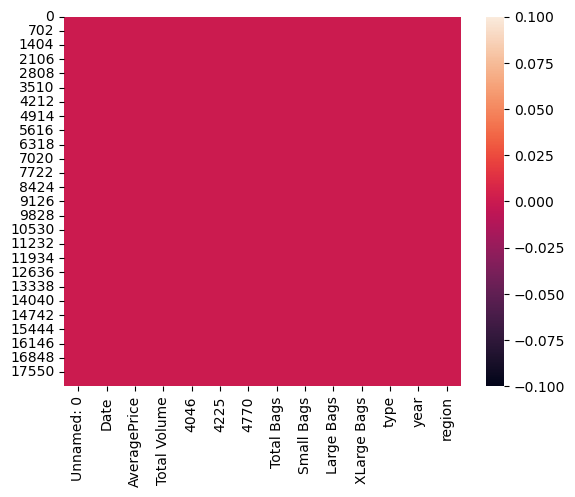

In [9]:
# Heatmap of null values
sns.heatmap(df.isnull())

In [10]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [11]:
# Changing Date columns Datatype and creat saperate columns for each

df['Date'] = pd.to_datetime(df['Date'])

# Create separate columns for year, month, and day
#df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [12]:
df.head(2)

Unnamed: 0       Date  AveragePrice  Total Volume     4046      4225  \
0           0 2015-12-27          1.33      64236.62  1036.74  54454.85   
1           1 2015-12-20          1.35      54876.98   674.28  44638.81   

    4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0  48.16     8696.87     8603.62       93.25          0.0  conventional  2015   
1  58.33     9505.56     9408.07       97.49          0.0  conventional  2015   

   region  month  day  
0  Albany     12   27  
1  Albany     12   20

In [13]:
# now lets delete Unnamed: 0 column because it is representing only index number 
# also deleting Date column because we already made two more columns from this
df.drop(['Unnamed: 0','Date'], axis=1, inplace=True)

In [14]:
df.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags          type  year  region  month  day  
0     8603.62       93.25          0.0  conventional  2015  Albany     12   27  
1     9408.07       97.49          0.0  conventional  2015  Albany     12   20

In [15]:
# checking information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


In [16]:
#describing data
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  \
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000   
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899   
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938   
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000   
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000   
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000   
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000   
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000   

              month           day  
count  18249.000000  18249.000000  
mean       6.177215     15.662612  
std        3.534130      8.776281  
min        1.000000      1.000000  
25%        3.000000      8.000000  
50%        6.000000     16.000000  
75%        9.000000     23.000000  
max       12.000000     31.000000

# Observation
- Seems like outliers in XLarge Bags  
- Also in some columns , there is good gap between 'mean' value and '50%' value.
- No Null Value.
- There might be outliers , lets check in further steps.


# Visualization 

<Axes: xlabel='year', ylabel='AveragePrice'>

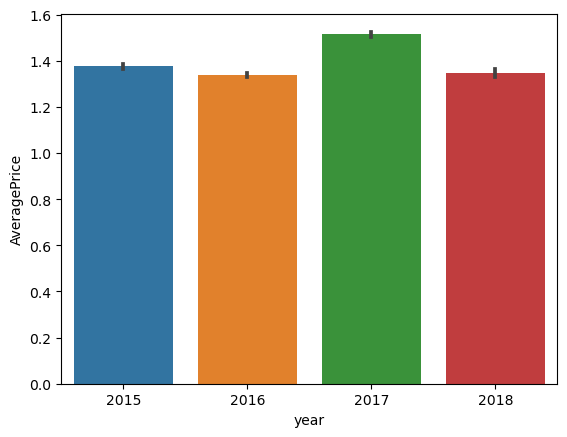

In [17]:
#checking ratio of year and price 
sns.barplot(x='year',y='AveragePrice',data=df)

Seems like price was highest in 2017 

<Axes: xlabel='month', ylabel='AveragePrice'>

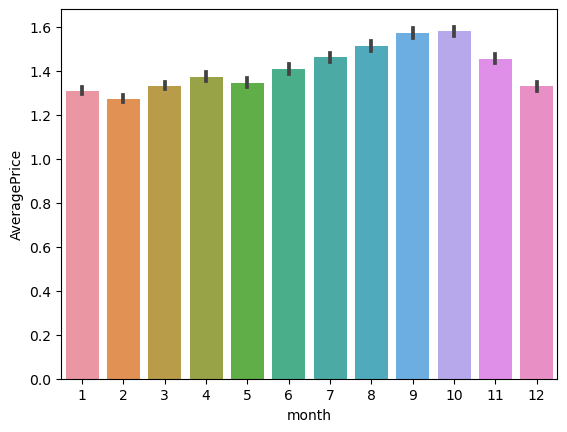

In [18]:
#checking ratio of month and price
sns.barplot(x='month',y='AveragePrice',data=df)

 - Seems like Sep and Oct are the highest priced month
 - Also observed rest of year price is almost same 

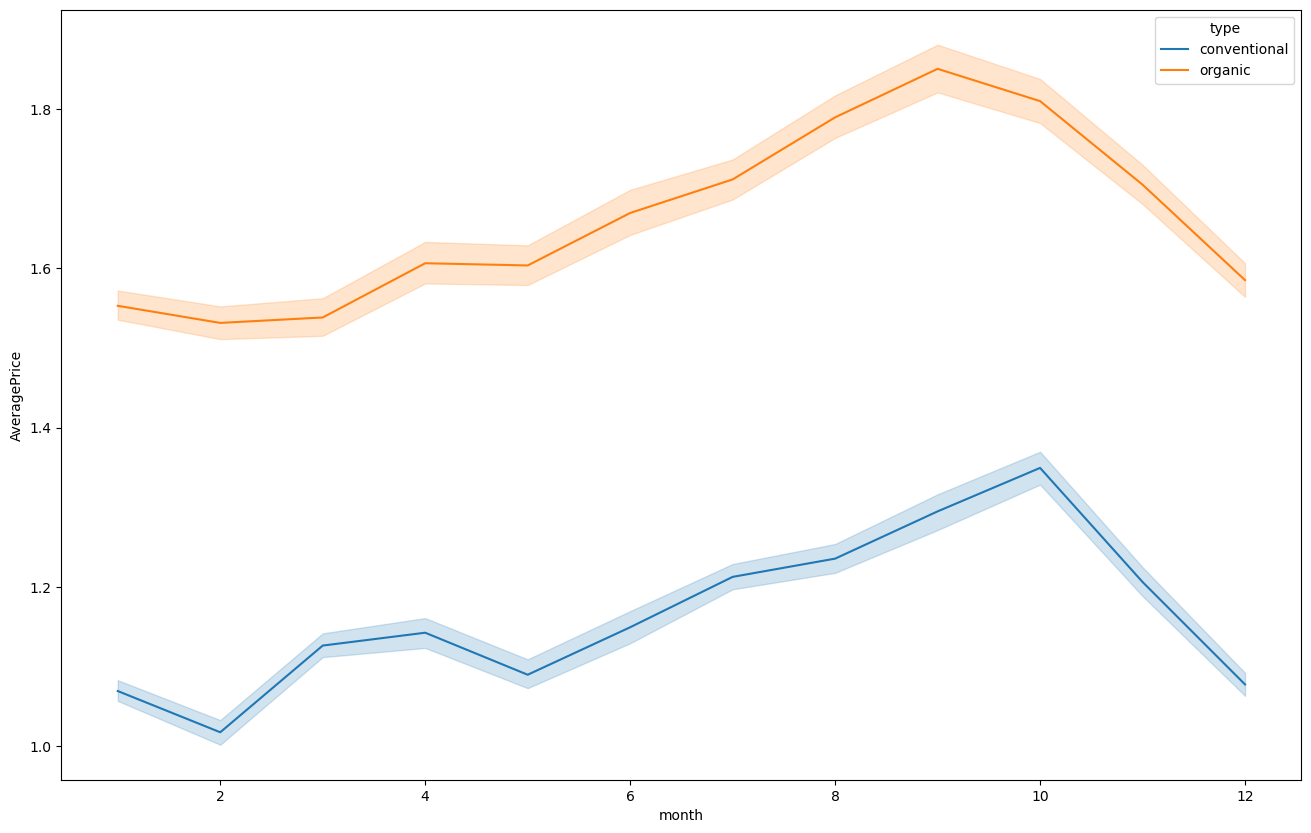

In [19]:
# plot line plot 
plt.figure(figsize=(16,10))
sns.lineplot(x='month',y='AveragePrice',data=df,hue='type')
plt.show()

array([[<Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>,
        <Axes: title={'center': '4225'}>],
       [<Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>,
        <Axes: title={'center': 'Large Bags'}>],
       [<Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

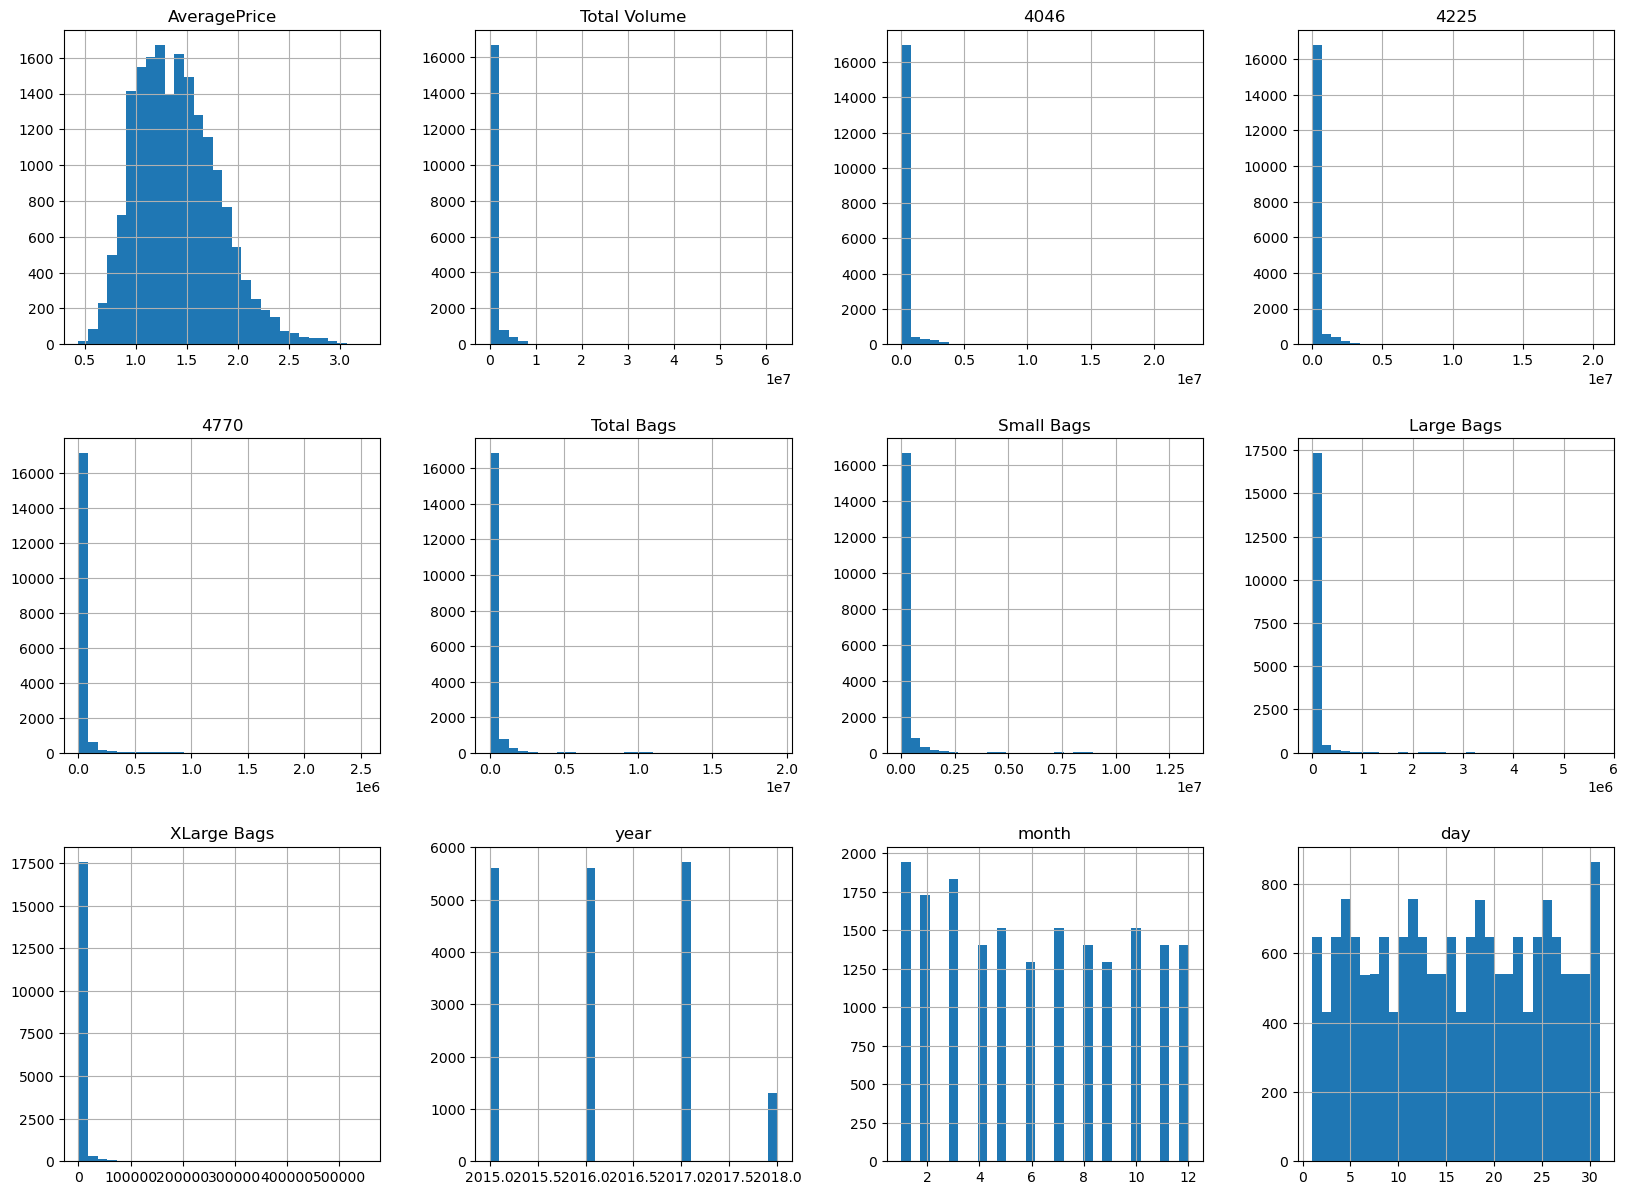

In [20]:
# Ploting histplot for univariate analysis
df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

Observation 
- Avg price column is normally distributing over the histogram
- Almost left skewed data
- To make the column as normal distributed we can use different methods, but I am using numPy log to make the skew values as normal distributed.

In [21]:
# Separate numerical and categorical columns for better visualization
numerical_columns = df.select_dtypes(include='number').columns
categorical_columns = df.select_dtypes(include='object').columns

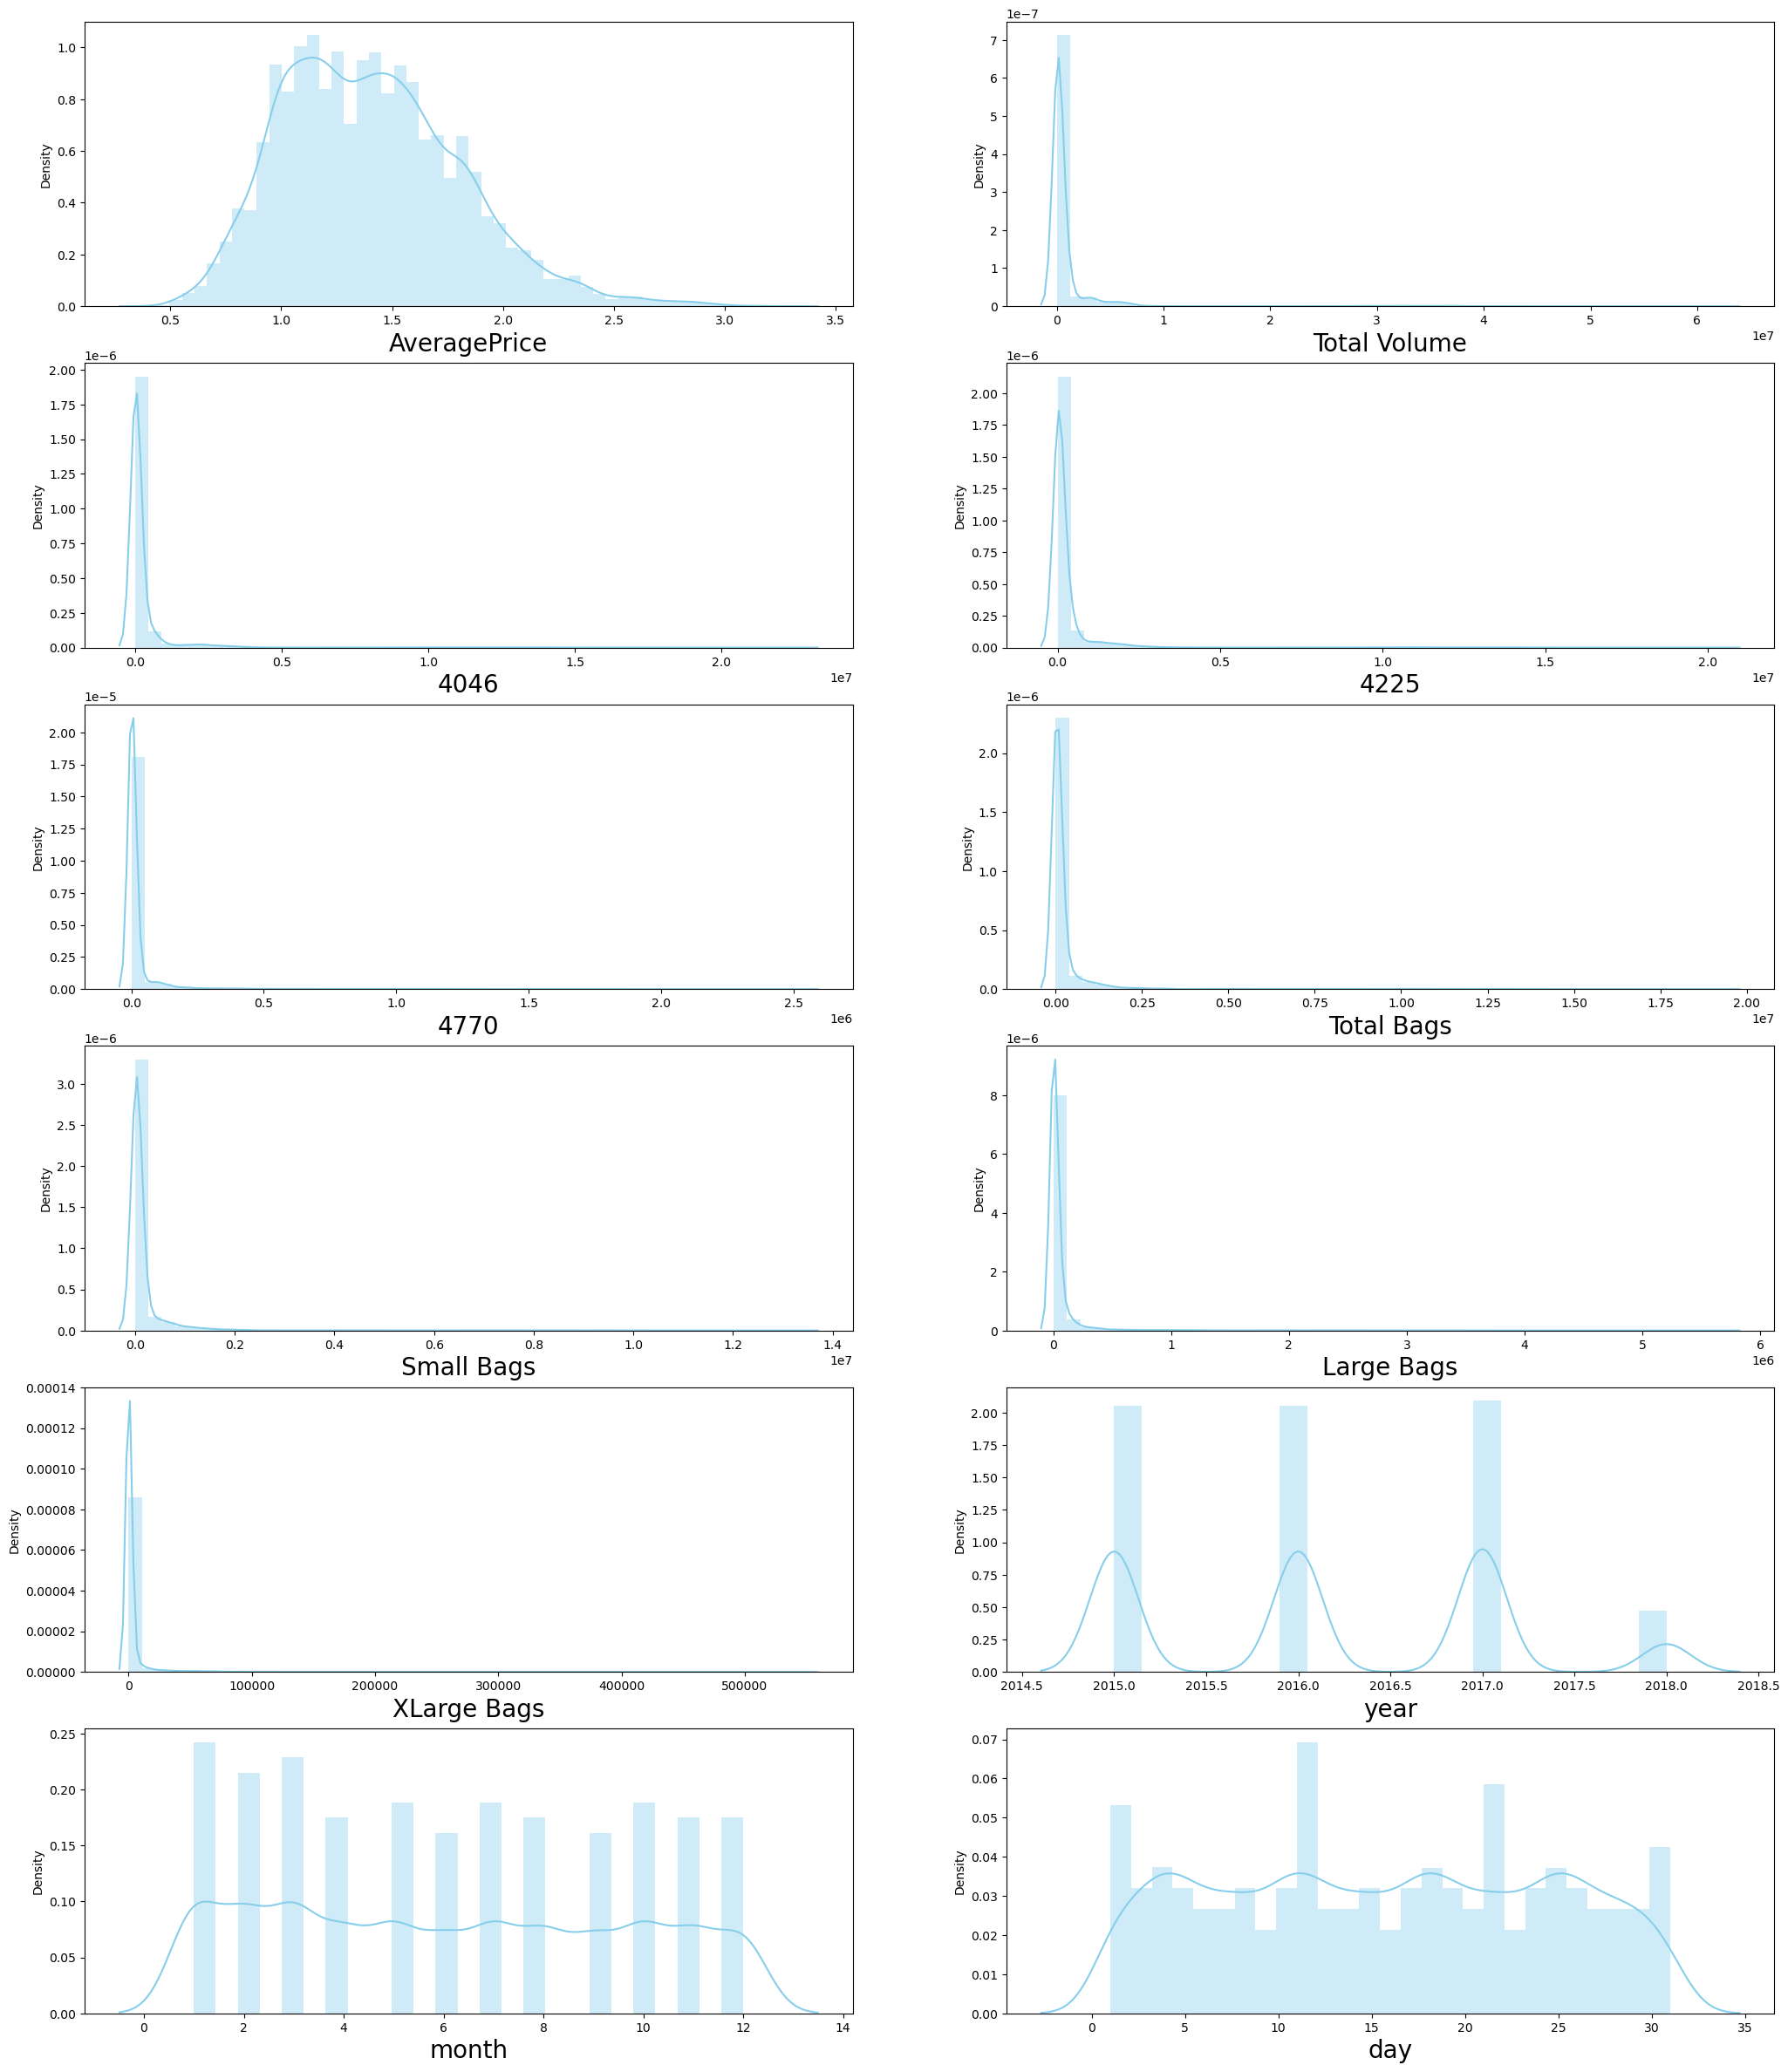

In [22]:
# Plotting Distribution Plot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical_columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

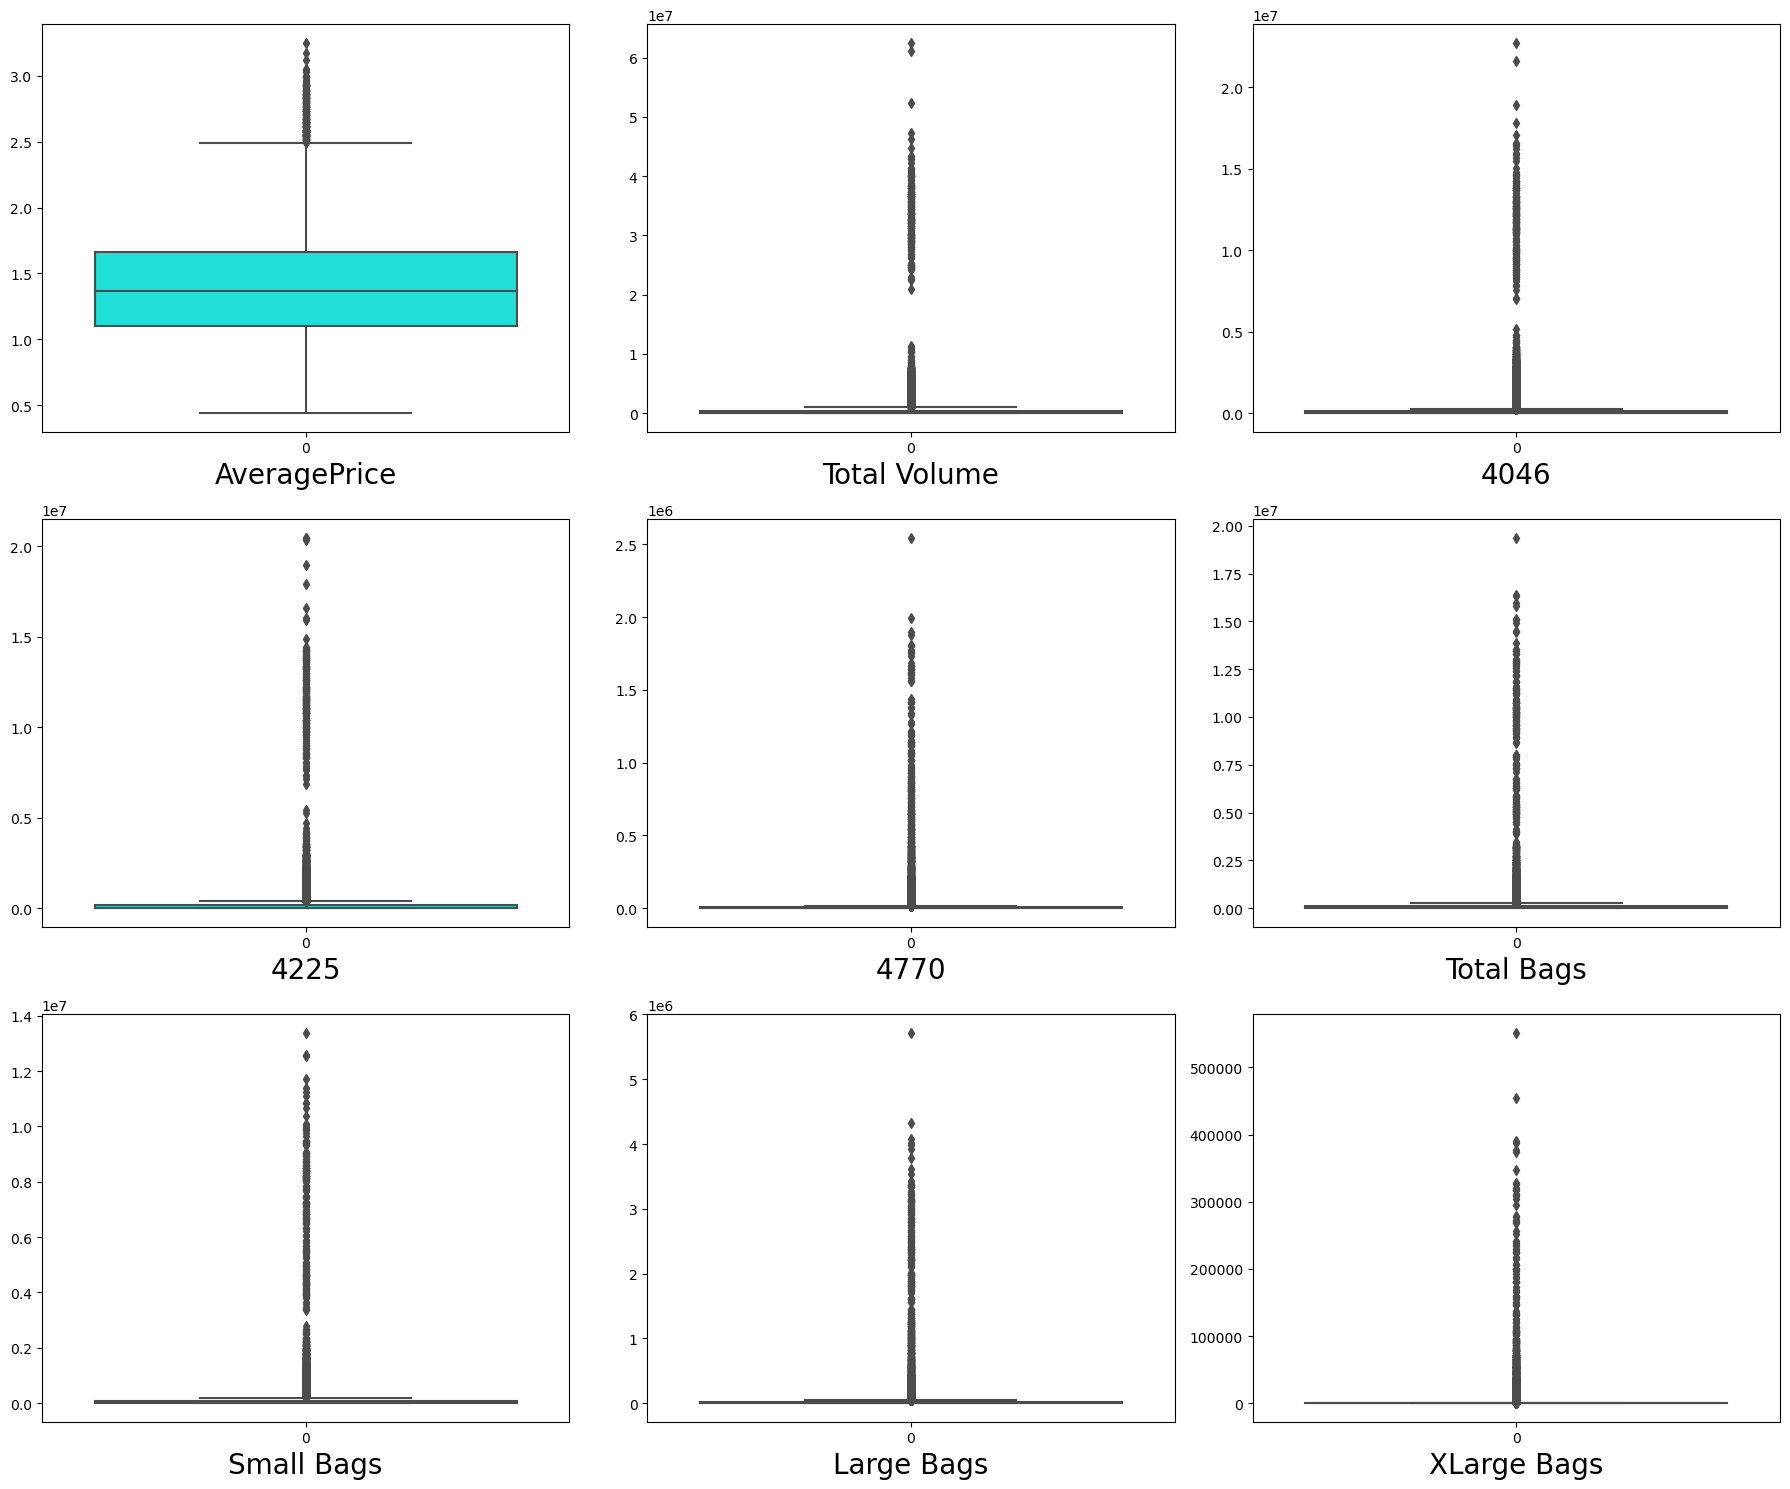

In [23]:
# Box plot for outlier checking 
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in numerical_columns:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()


 So there are many outliers present 

In [45]:
# value counts of type
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

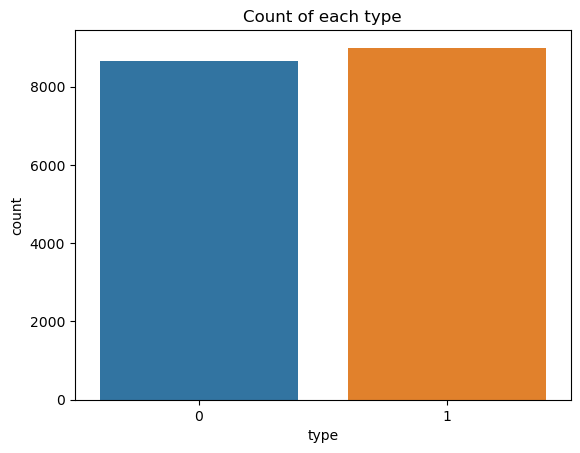

In [94]:
df['type'].value_counts()
sns.countplot(x='type' , data = df)
plt.title('Count of each type')
plt.show()

<Axes: xlabel='AveragePrice', ylabel='type'>

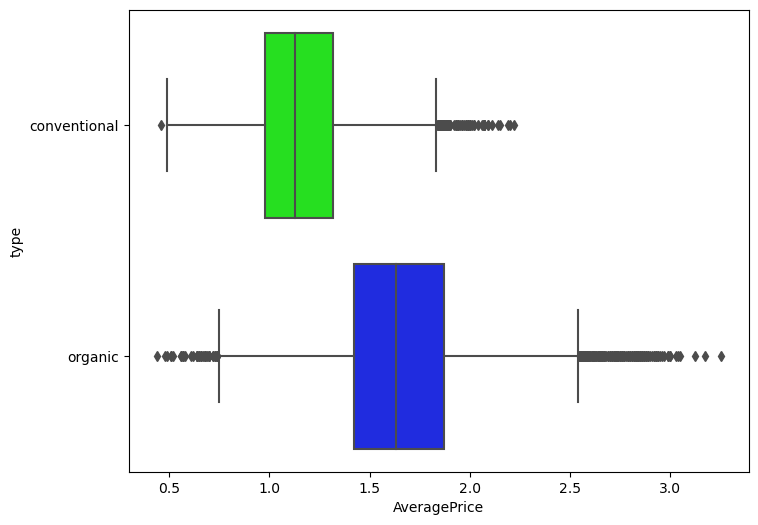

In [46]:
plt.figure(figsize=(8,6))
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'hsv')

# Few things to observe
- Oraganic Avocado is almost 43% more costlier than conventional Avacado.
- We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
- This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.

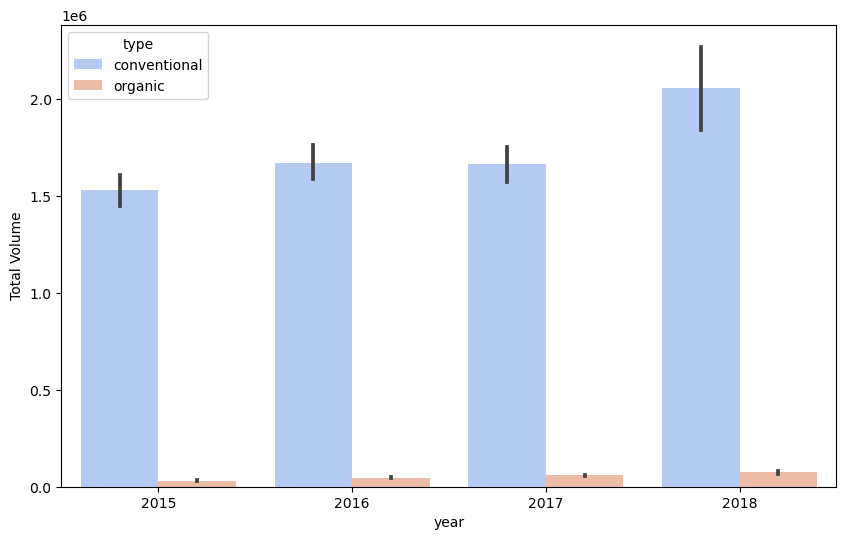

In [47]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

COnventional Avocado are in more demand 

In [48]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [49]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

In [50]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

Total Volume AveragePrice
                              sum          sum
region                                        
Albany               1.606780e+07       527.63
Atlanta              8.860512e+07       452.23
BaltimoreWashington  1.347139e+08       518.57
Boise                1.441319e+07       455.67
Boston               9.727398e+07       517.44
BuffaloRochester     2.296247e+07       512.69
California           1.028982e+09       471.62
Charlotte            3.555554e+07       542.84
Chicago              1.337023e+08       526.19
CincinnatiDayton     4.452201e+07       408.71
Columbus             2.999336e+07       423.44
DallasFtWorth        2.084193e+08       366.93
Denver               1.389025e+08       411.88
Detroit              6.342242e+07       431.32
GrandRapids          3.021174e+07       508.69
GreatLakes           5.896425e+08       452.43
HarrisburgScranton   4.180886e+07       511.49
HartfordSpringfield  5.067054e+07       614.70
Houston              2.031679e+08       354.20
Indianapolis         3.026339e+07       444.13
Jacksonville         2.879000e+07       510.70
LasVegas             5.437691e+07       466.75
LosAngeles           5.078965e+08       411.01
Louisville           1.609700e+07       434.90
MiamiFtLauderdale    9.767322e+07       482.83
Midsouth             5.083494e+08       474.81
Nashville            3.561209e+07       409.69
NewOrleansMobile     4.569514e+07       441.02
NewYork              2.407341e+08       583.92
Northeast            7.132809e+08       541.45
NorthernNewEngland   7.153289e+07       499.36
Orlando              5.866070e+07       509.10
Philadelphia         7.183880e+07       551.66
PhoenixTucson        1.956433e+08       413.86
Pittsburgh           1.880635e+07       461.14
Plains               3.111885e+08       485.54
Portland             1.105522e+08       445.39
RaleighGreensboro    4.820273e+07       525.63
RichmondNorfolk      4.223085e+07       436.47
Roanoke              2.504201e+07       421.80
Sacramento           7.516375e+07       548.09
SanDiego             8.979192e+07       472.58
SanFrancisco         1.358302e+08       609.82
Seattle              1.092142e+08       487.59
SouthCarolina        6.075377e+07       474.31
SouthCentral         1.011280e+09       372.22
Southeast            6.152384e+08       472.53
Spokane              1.556528e+07       488.61
StLouis              3.207283e+07       483.55
Syracuse             1.094267e+07       513.87
Tampa                6.600454e+07       476.19
TotalUS              5.864740e+09       445.83
West                 1.086779e+09       430.01
WestTexNewMexico     1.445218e+08       422.67

In [51]:
# Checking unique values and Yearwise total No of sale entry
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

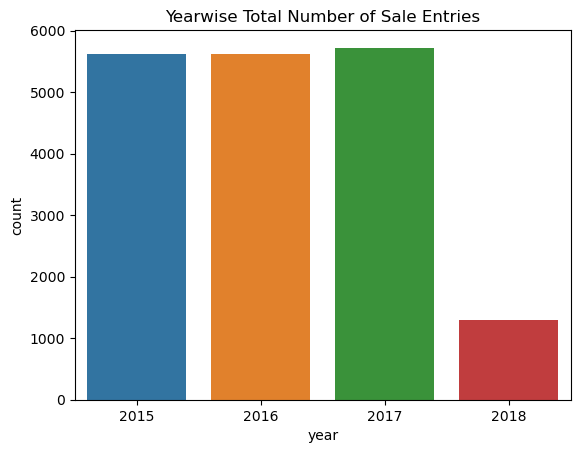

In [53]:
sns.countplot(x='year', data=df)
plt.title('Yearwise Total Number of Sale Entries')
plt.show()

<Axes: xlabel='month', ylabel='count'>

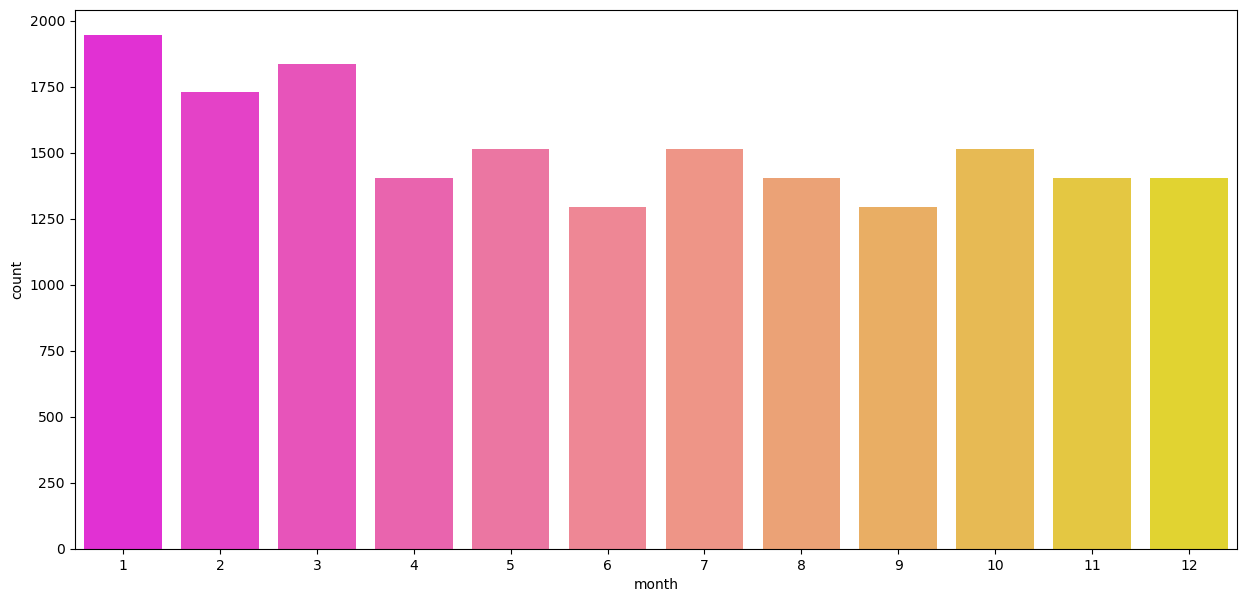

In [54]:
# Checking moth wise sales entry 
plt.figure(figsize=(15,7))
sns.countplot(x='month', data=df, palette="spring")

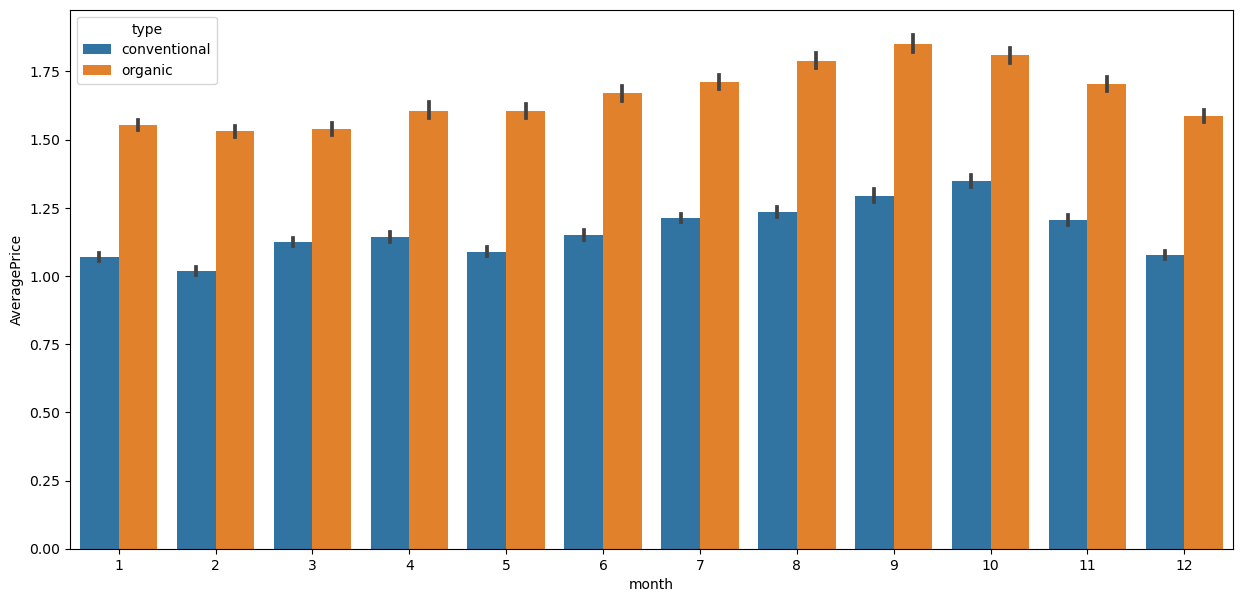

In [55]:
# Checking Month-Wise Variation in Average Price
plt.figure(figsize=(15,7))
sns.barplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

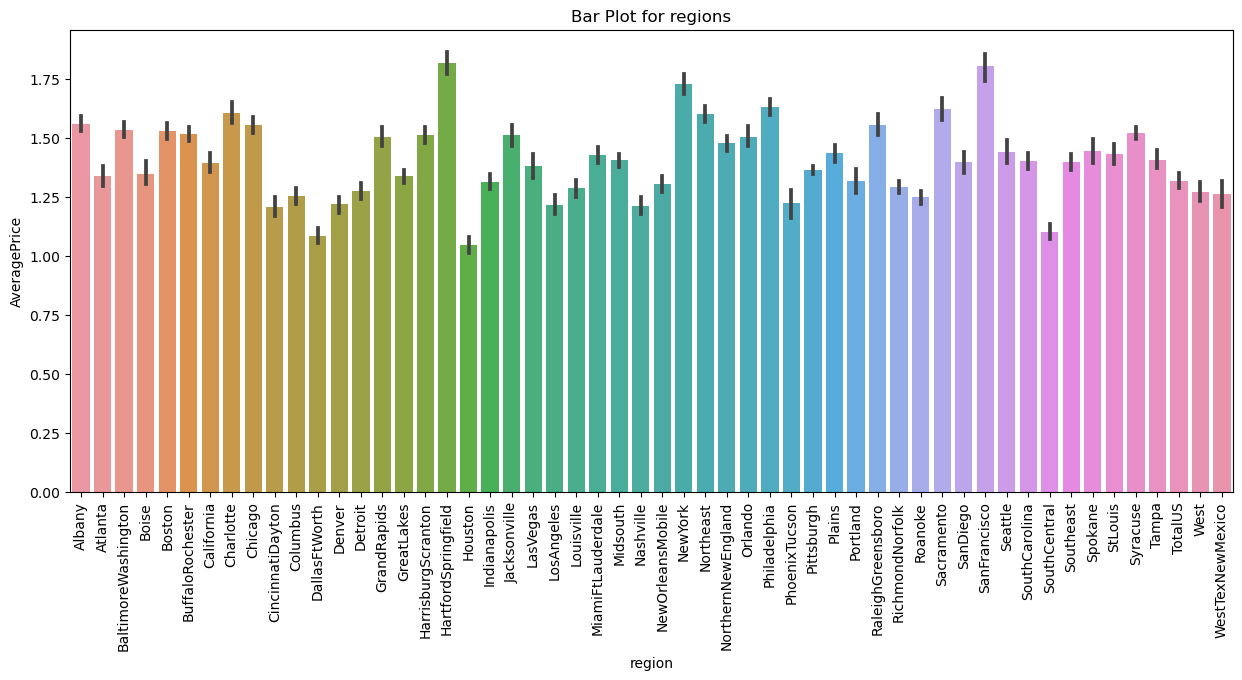

In [56]:
# Exploring region
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

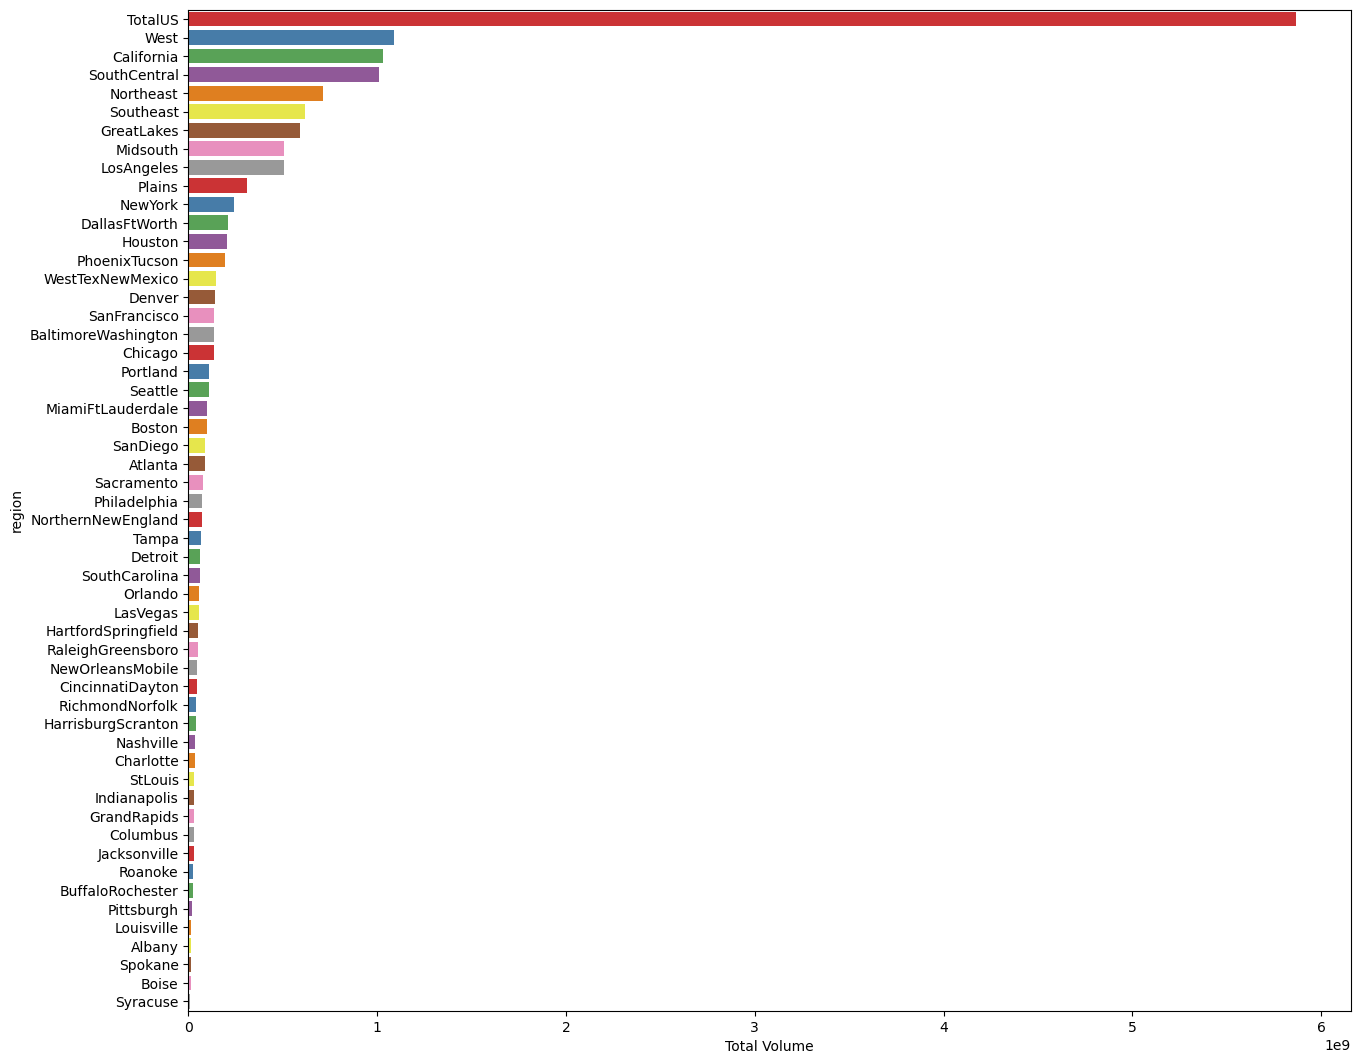

In [57]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

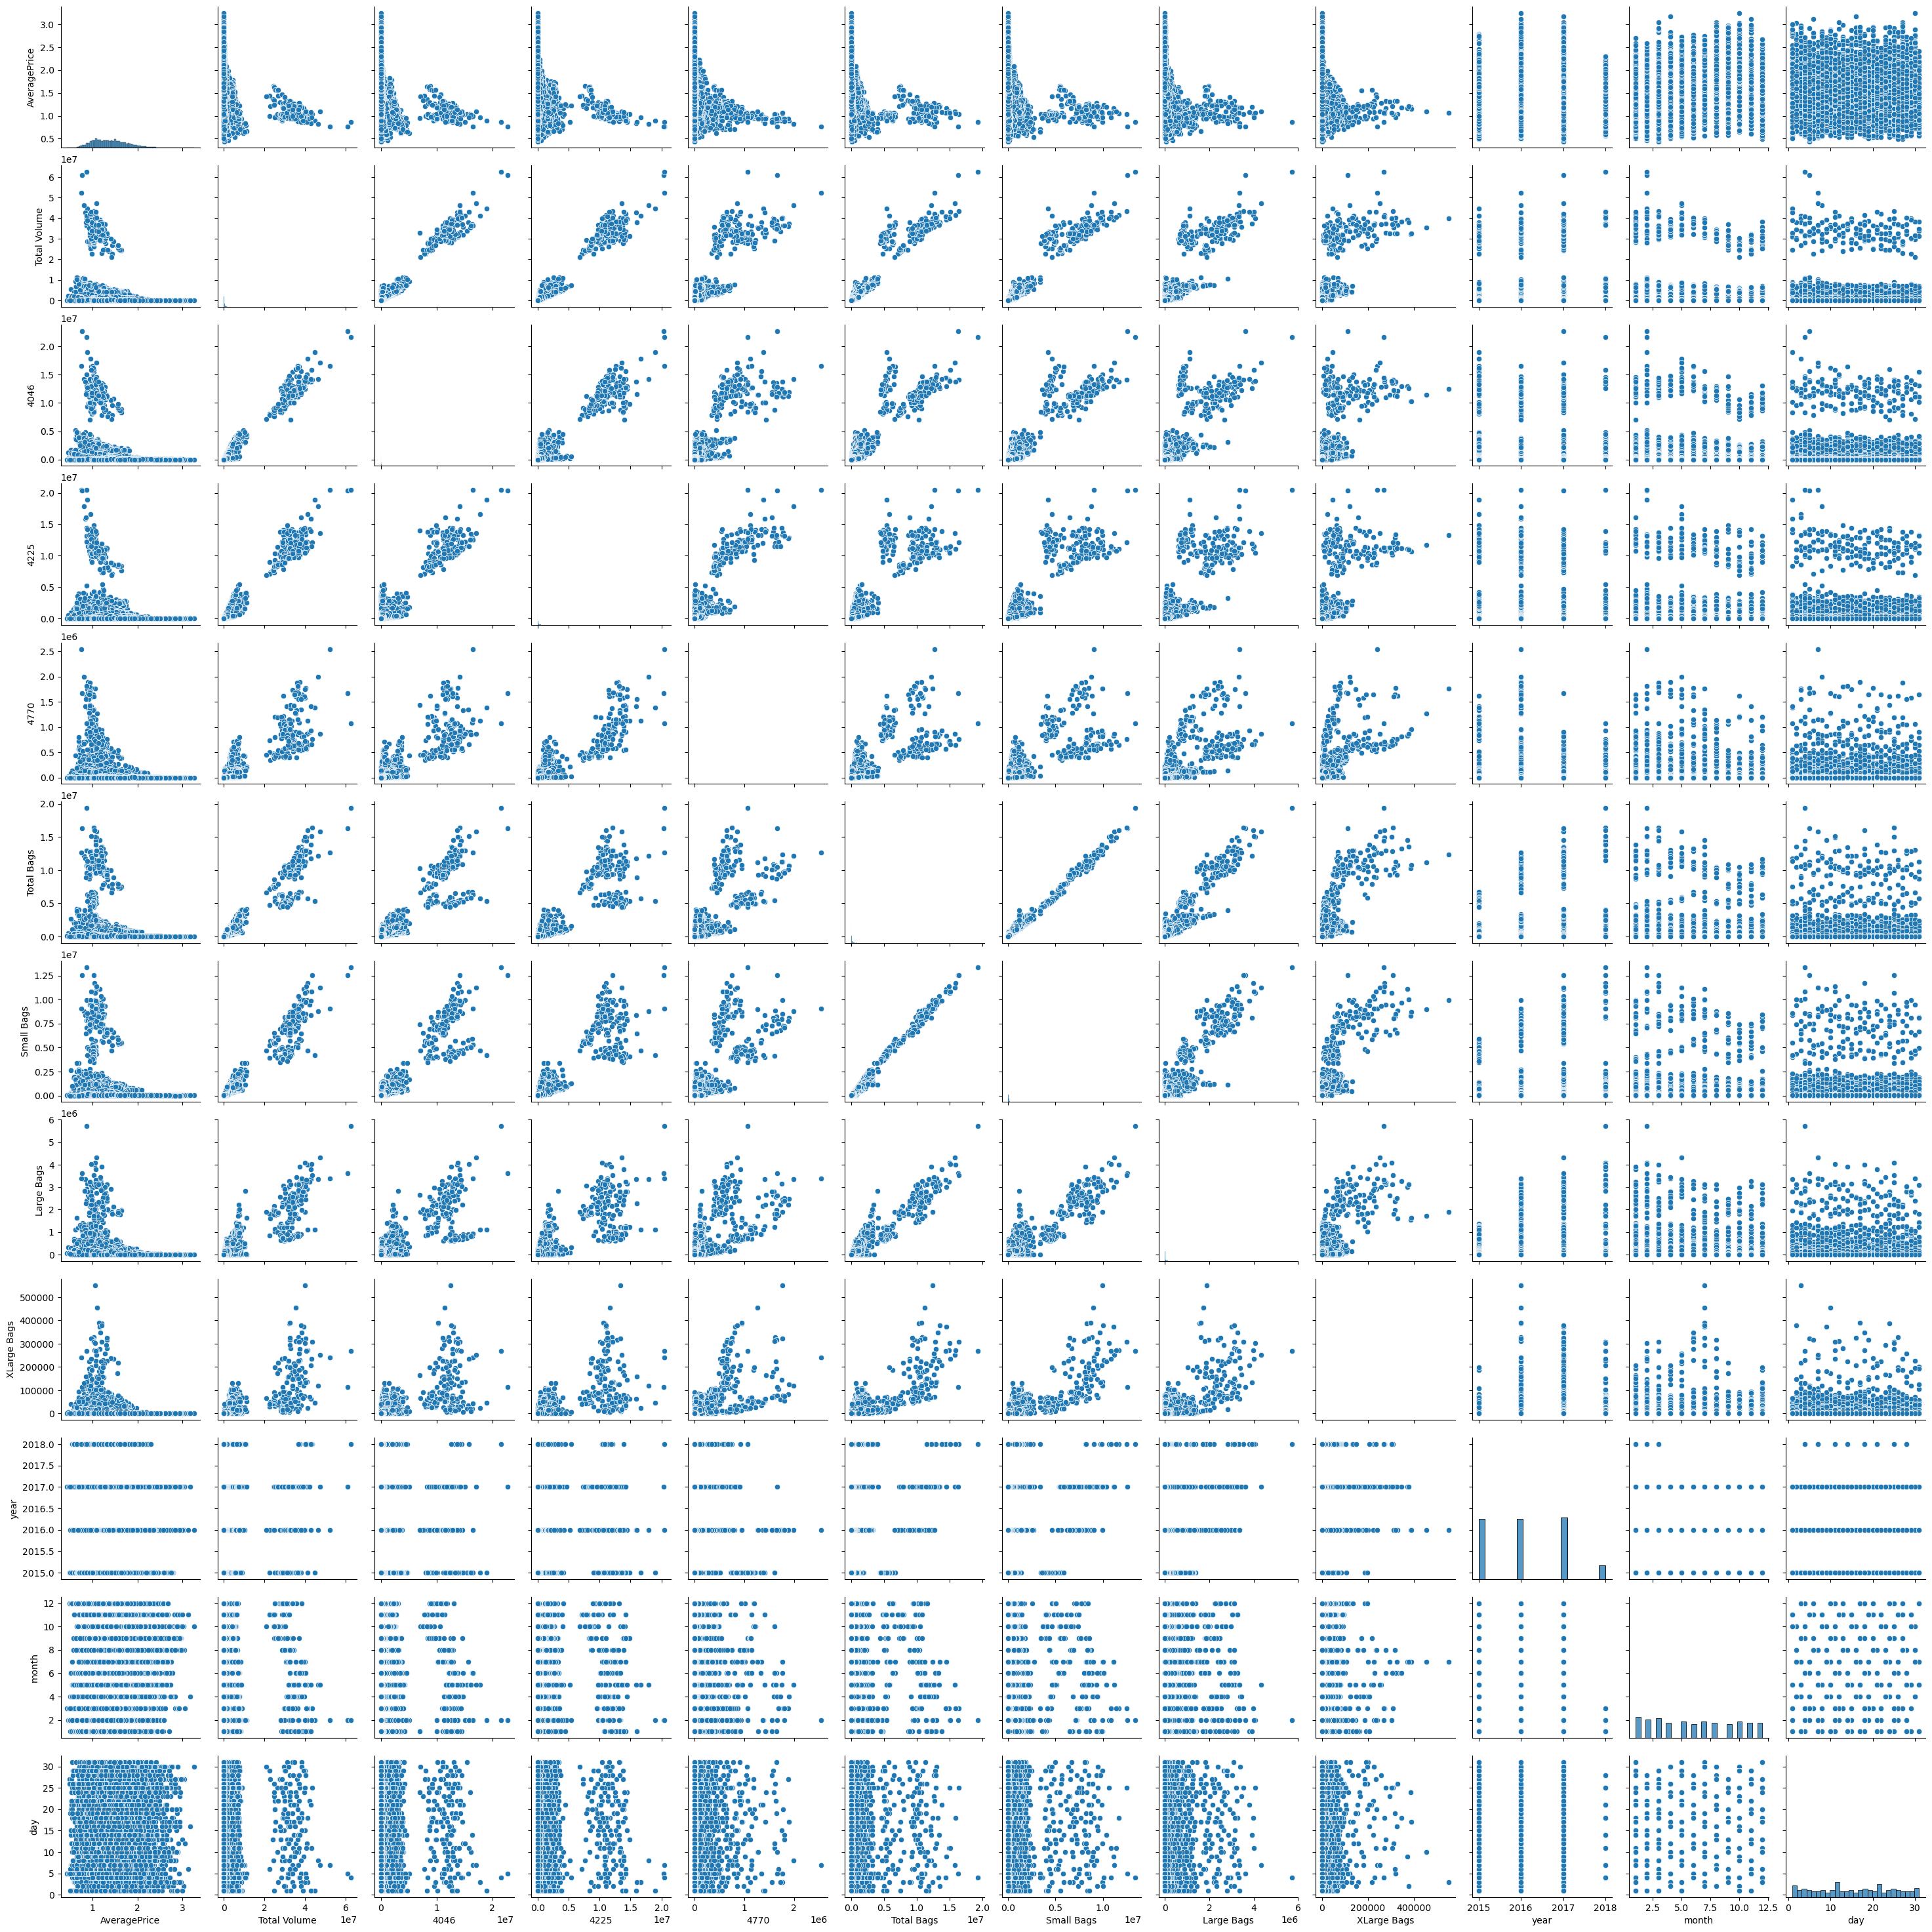

In [58]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Factors Heat Map')

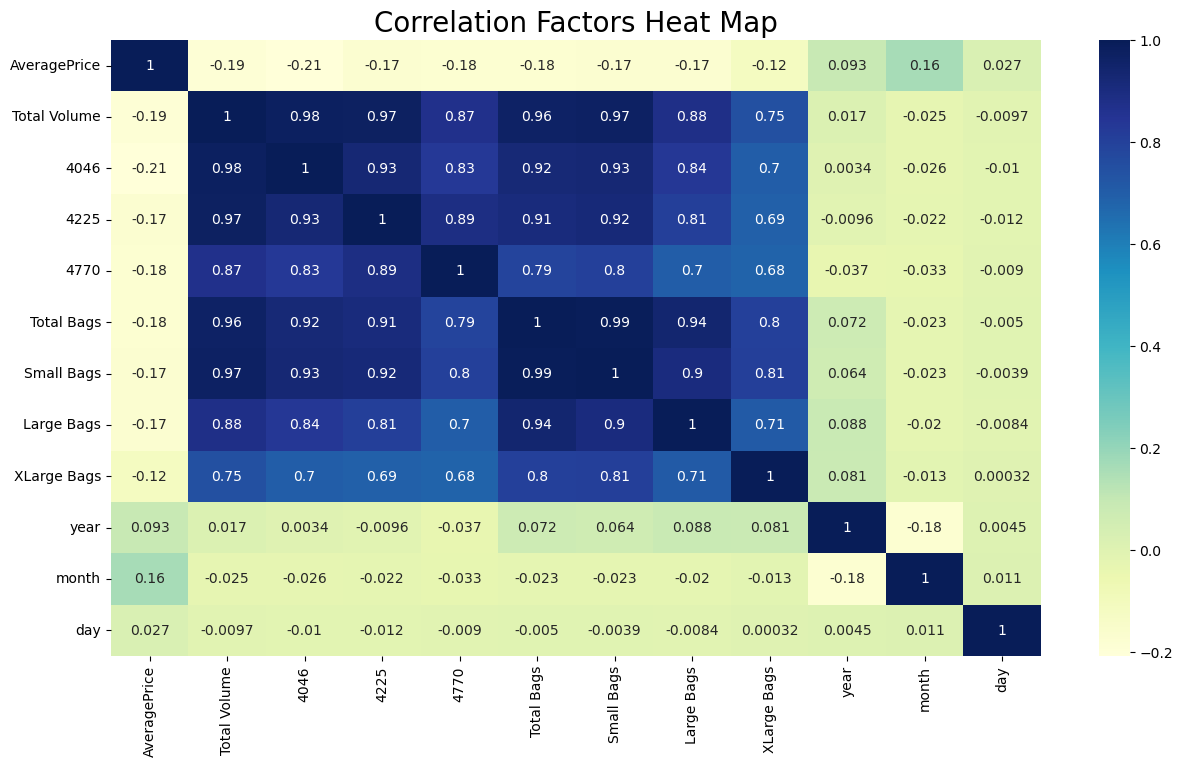

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu').set_title('Correlation Factors Heat Map', size = '20')

# Data Cleaning 

In [60]:
# Encoding Catagorical Data 
le = LabelEncoder()
df['region']=le.fit_transform(df['region'])
df['type']=le.fit_transform(df['type'])
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

In [61]:
# handling  Outliers 
z = np.abs(zscore(df))
threshold = 3
df = df[(z<3).all(axis = 1)]

In [62]:
df.shape

(17651, 14)

In [63]:
initial_rows = 18249
rows_after_outlier_removal = 17651

loss_percentage = ((initial_rows - rows_after_outlier_removal) / initial_rows) * 100

print(f"Loss Percentage: {loss_percentage:.2f}%")

Loss Percentage: 3.28%


In [64]:
# Since we have to predict Avg price as well as region so copying data 
df1= df.copy()

# Average Price 

# Data Cleaning for Avg Price 

In [66]:
# Checking Corelation
correlation_with_quality = df.corr()['AveragePrice'].abs().sort_values(ascending=False)
print(correlation_with_quality)

AveragePrice    1.000000
type            0.613150
4046            0.333577
Total Volume    0.332056
Total Bags      0.297323
Small Bags      0.275771
Large Bags      0.270915
4225            0.243988
4770            0.243465
XLarge Bags     0.152669
month           0.149502
year            0.091704
day             0.026819
region          0.003242
Name: AveragePrice, dtype: float64


Since 'day' & 'region' very low coreleted with Target column , thus can delete them

In [67]:
df.drop(columns=['region','day',],axis=1, inplace=True)

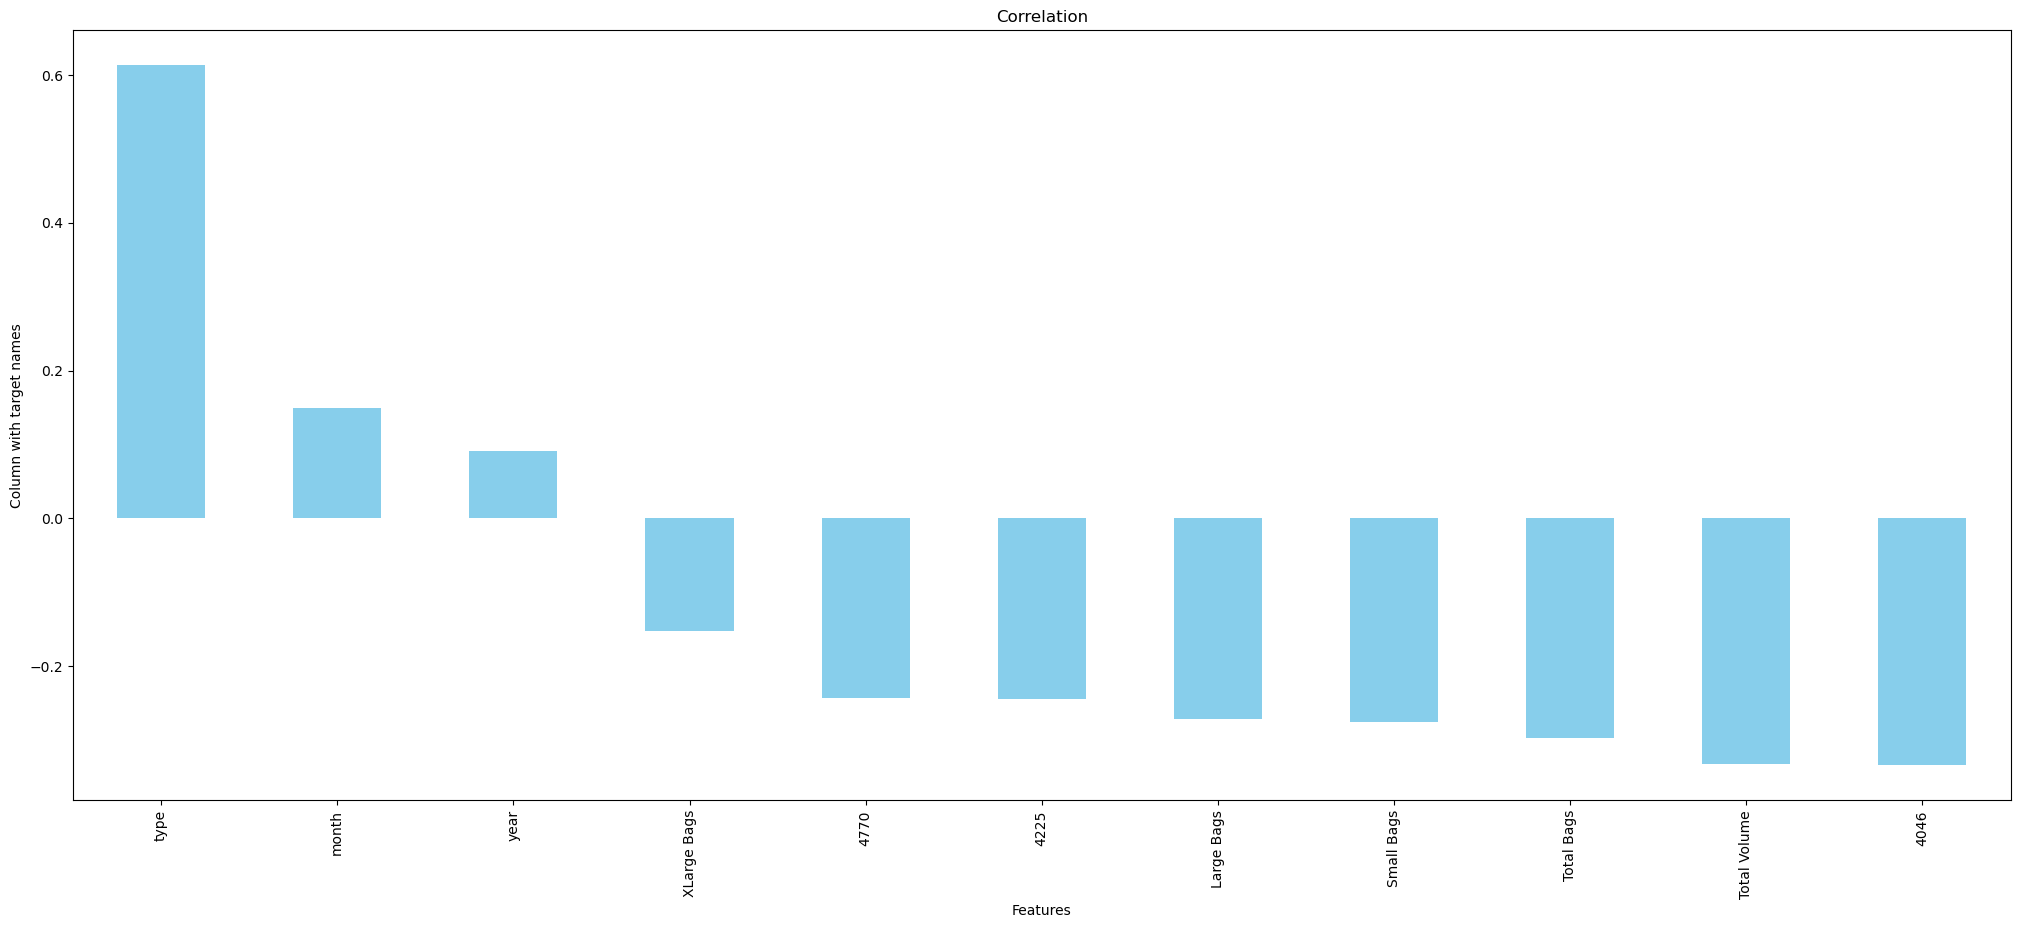

In [68]:
plt.figure(figsize =(25, 10))
df.corr()['AveragePrice'].sort_values(ascending = False).drop(['AveragePrice']).plot(kind ='bar', color ='skyblue')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

In [69]:
#checking correlation of column with column
df_corr = df.corr()
df_corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
month             0.149502     -0.018645 -0.015797 -0.019844 -0.027245   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
year            0.103442    0.086639    0.119543     0.108209  0.003867   
month          -0.010916   -0.013018   -0.001457     0.002843 -0.009499   

                  year     month  
AveragePrice  0.091704  0.149502  
Total Volume -0.004866 -0.018645  
4046         -0.034636 -0.015797  
4225         -0.040234 -0.019844  
4770         -0.082054 -0.027245  
Total Bags    0.103442 -0.010916  
Small Bags    0.086639 -0.013018  
Large Bags    0.119543 -0.001457  
XLarge Bags   0.108209  0.002843  
type          0.003867 -0.009499  
year          1.000000 -0.175287  
month        -0.175287  1.000000

In [70]:
correlation_threshold = 0.8
mask = df_corr.abs() >= correlation_threshold
features_to_drop = set()
for i in range(len(df_corr.columns)):
    for j in range(i+1, len(df_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df_corr.columns[i]
            colname_j = df_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop.add(colname_j)

In [71]:
features_to_drop

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [72]:
#These columns are highly correlated with each other
df.drop(columns=['4046','4225','Small Bags','Total Bags'],axis=1, inplace=True)

In [73]:
# Variance inflation factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

VIF      Features
0  24.335862  AveragePrice
1   3.578808  Total Volume
2   2.086244          4770
3   2.007790    Large Bags
4   1.557572   XLarge Bags
5   3.649424          type
6  19.892083          year
7   4.213685         month

In [74]:
df.drop(columns=['year'],axis=1, inplace=True)

# Skewness of features 

In [75]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
month           0.107408
dtype: float64

In [76]:
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

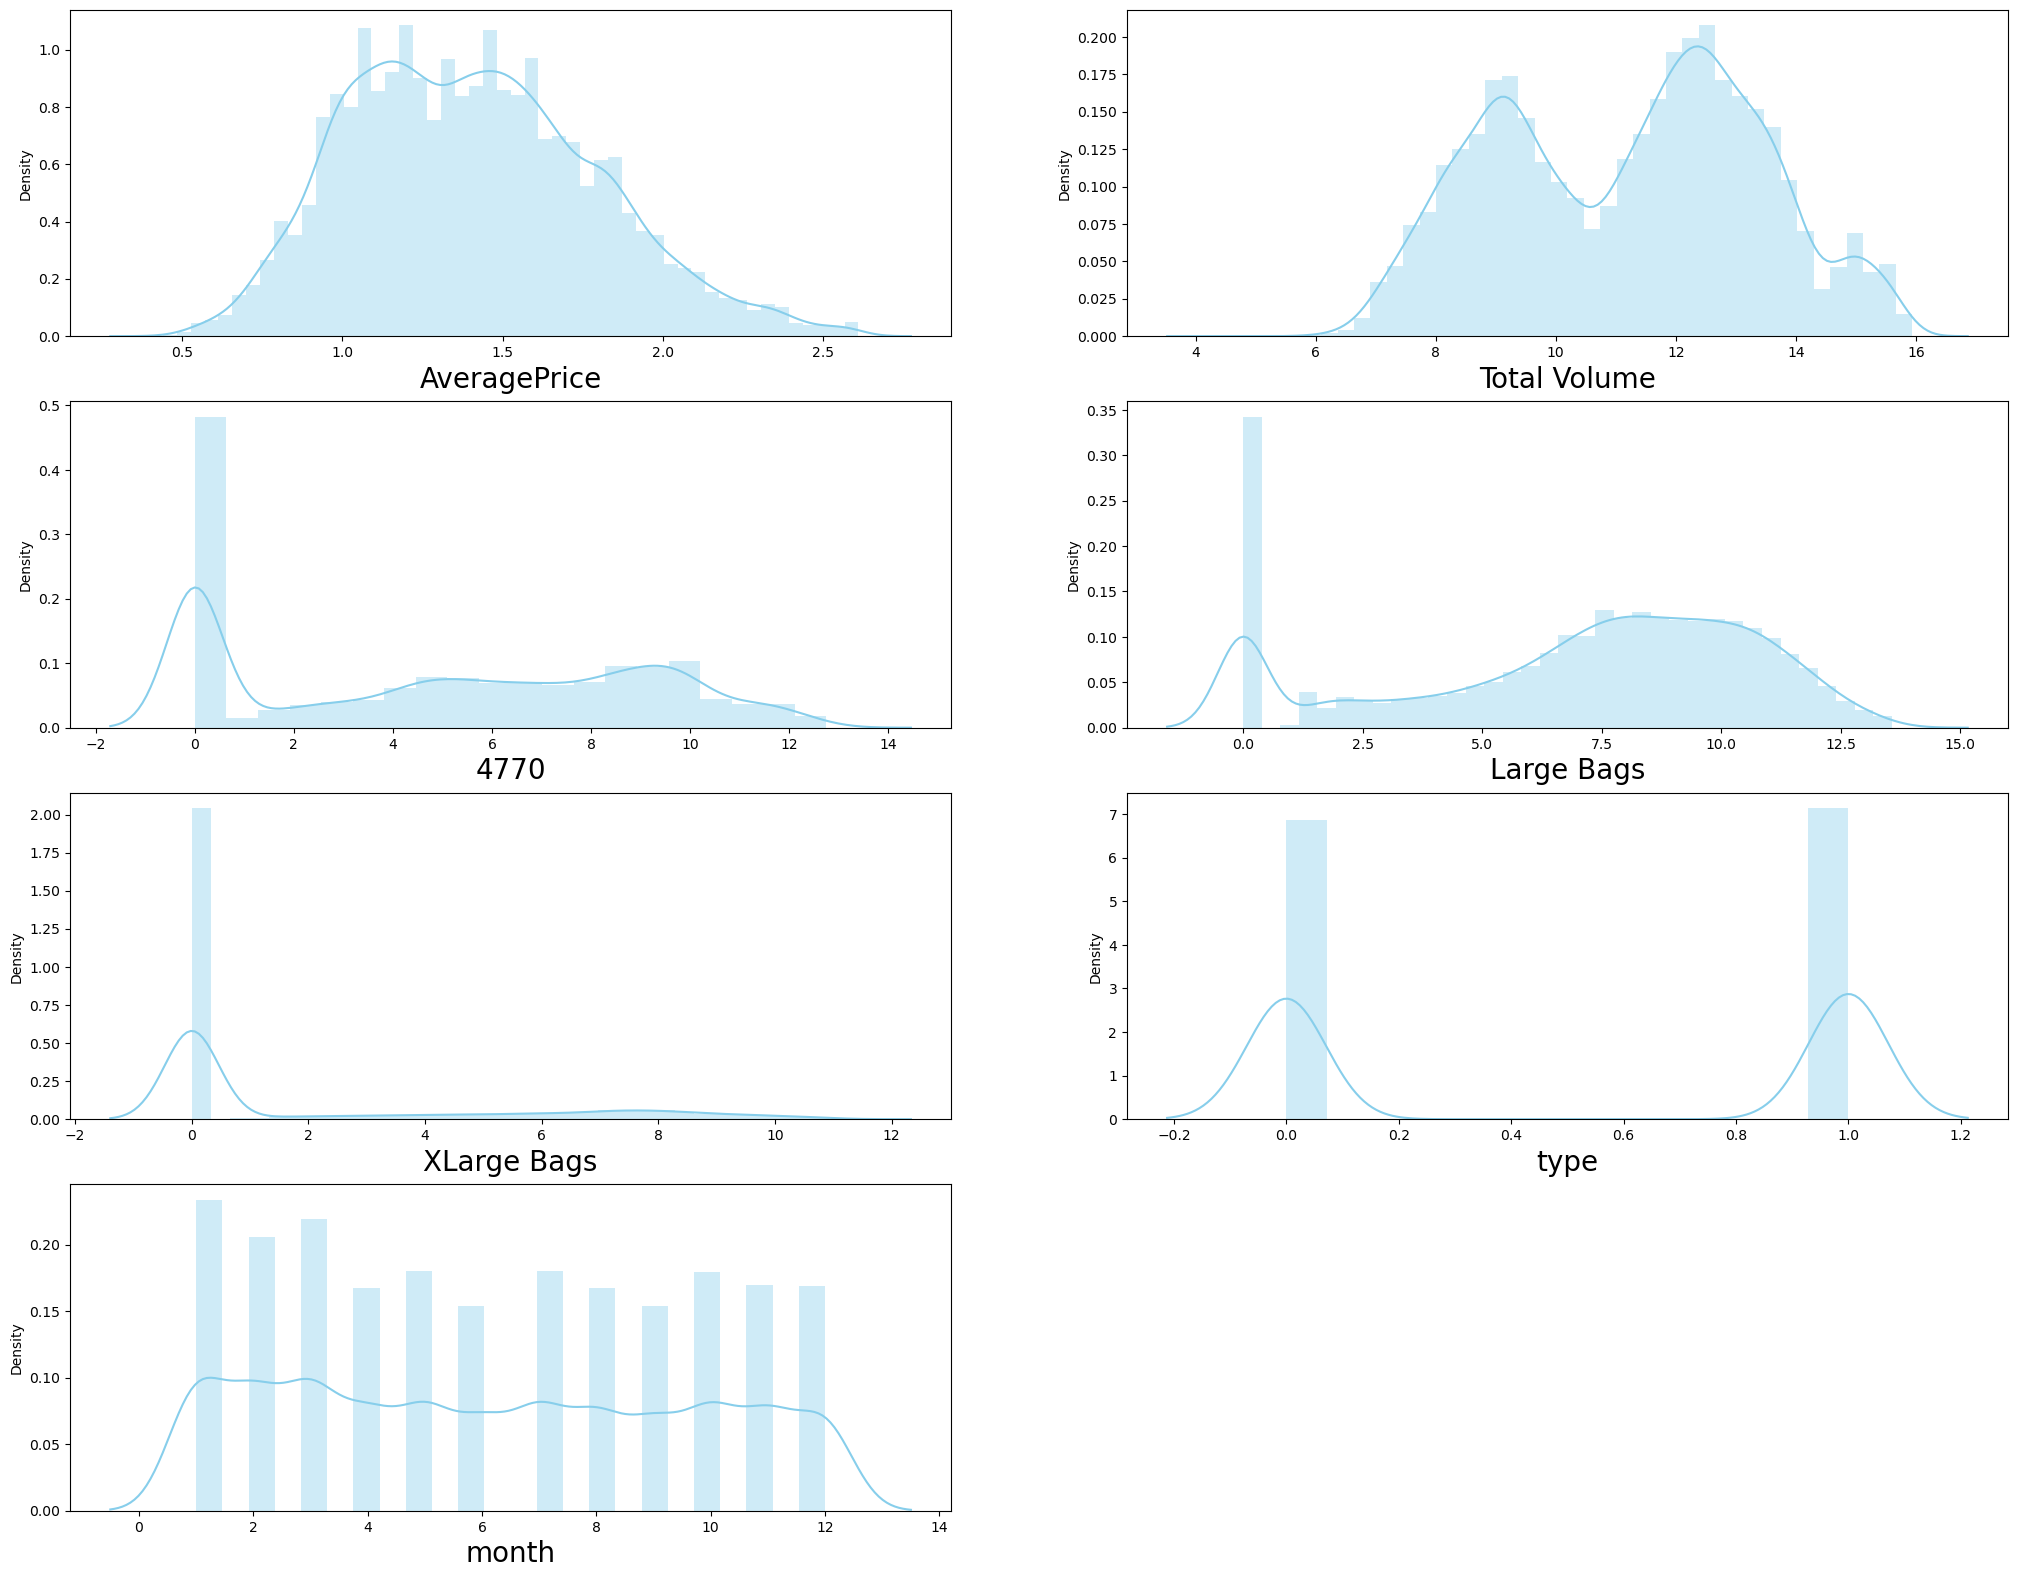

In [77]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [78]:
# Splitting the columns into feature and label
X = df.drop("AveragePrice",axis=1)
y = df["AveragePrice"]

In [79]:
# Scaling Data using StandardScaler
std=StandardScaler()
X = pd.DataFrame(std.fit_transform(X), columns=X.columns)

In [80]:
# Splitting the data for training and testing
# Finding best random state
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.22, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best accuracy is', maxR2_score ,'on Random_state', maxRS)

Best accuracy is 0.4721646952742765 on Random_state 82


In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.22,random_state=maxRS)

# Model Evaluation 

In [90]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [91]:
models = {
    "Random Forest": RandomForestRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "Linear Regression": LinearRegression(),
    "KNeighbors Regressor": KNeighborsRegressor(),
    "SGD Regressor": SGDRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "xgb": XGBRegressor()
}

trained_model_list = []
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    mae,  rmse, r2_square = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2 score", r2_square)

    r2_list.append(r2_square)

    print('=' * 35)
    print('\n')

Random Forest
Model Training Performance
RMSE: 0.22536205730858141
MAE: 0.16347116374871268
R2 score 0.6589200249442355


Decision Tree
Model Training Performance
RMSE: 0.30441101476692906
MAE: 0.21183316168898042
R2 score 0.3776777180552954


SVR
Model Training Performance
RMSE: 0.25461024922973047
MAE: 0.19512217791432568
R2 score 0.5646421403490589


Linear Regression
Model Training Performance
RMSE: 0.28035086787069935
MAE: 0.22178514688048226
R2 score 0.4721646952742765


KNeighbors Regressor
Model Training Performance
RMSE: 0.23803157974461236
MAE: 0.17579248197734296
R2 score 0.6194920078350766


SGD Regressor
Model Training Performance
RMSE: 0.2808524719466119
MAE: 0.22259731605260877
R2 score 0.4702741985506843


Gradient Boosting
Model Training Performance
RMSE: 0.24979164168416537
MAE: 0.19508352185477587
R2 score 0.5809648737611753


Bagging Regressor
Model Training Performance
RMSE: 0.23269387396412594
MAE: 0.16926493305870235
R2 score 0.6363659648863371


Lasso
Model Trai

Random Forest is giving highest accuracy .

# prediction on the basis of Region 

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score,recall_score, f1_score


In [98]:
df1.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags  type  year  region  month  day  
0     8603.62       93.25          0.0     0  2015       0     12   27  
1     9408.07       97.49          0.0     0  2015       0     12   20  
2     8042.21      103.14          0.0     0  2015       0     12   13  
3     5677.40      133.76          0.0     0  2015       0     12    6  
4     5986.26      197.69          0.0     0  2015       0     11   29

In [99]:
#correlation with target column
correlation_with_quality = df1.corr()['region'].abs().sort_values(ascending=False)
print(correlation_with_quality)

region          1.000000
Large Bags      0.127635
4046            0.119067
4770            0.095972
Total Bags      0.085892
Total Volume    0.076676
Small Bags      0.065976
XLarge Bags     0.044338
type            0.018409
4225            0.011002
year            0.004417
AveragePrice    0.003242
month           0.000119
day             0.000046
Name: region, dtype: float64


In [100]:
# deleting day as it very less corelated 
df1.drop(columns=['day','month'],axis=1, inplace=True)

In [101]:
df1.head(2)

AveragePrice  Total Volume     4046      4225   4770  Total Bags  \
0          1.33      64236.62  1036.74  54454.85  48.16     8696.87   
1          1.35      54876.98   674.28  44638.81  58.33     9505.56   

   Small Bags  Large Bags  XLarge Bags  type  year  region  
0     8603.62       93.25          0.0     0  2015       0  
1     9408.07       97.49          0.0     0  2015       0

In [102]:
#checking correlation
df1_corr = df1.corr()
df1_corr

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.332056 -0.333577 -0.243988 -0.243465   
Total Volume     -0.332056      1.000000  0.876307  0.871592  0.647518   
4046             -0.333577      0.876307  1.000000  0.565118  0.492127   
4225             -0.243988      0.871592  0.565118  1.000000  0.620221   
4770             -0.243465      0.647518  0.492127  0.620221  1.000000   
Total Bags       -0.297323      0.912184  0.727981  0.757786  0.557980   
Small Bags       -0.275771      0.905648  0.706800  0.778761  0.571512   
Large Bags       -0.270915      0.640642  0.561060  0.451711  0.323747   
XLarge Bags      -0.152669      0.513741  0.415432  0.392030  0.495976   
type              0.613150     -0.415476 -0.341376 -0.383138 -0.321809   
year              0.091704     -0.004866 -0.034636 -0.040234 -0.082054   
region           -0.003242      0.076676  0.119067  0.011002 -0.095972   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.297323   -0.275771   -0.270915    -0.152669  0.613150   
Total Volume    0.912184    0.905648    0.640642     0.513741 -0.415476   
4046            0.727981    0.706800    0.561060     0.415432 -0.341376   
4225            0.757786    0.778761    0.451711     0.392030 -0.383138   
4770            0.557980    0.571512    0.323747     0.495976 -0.321809   
Total Bags      1.000000    0.978213    0.746946     0.581690 -0.378205   
Small Bags      0.978213    1.000000    0.593155     0.597700 -0.367593   
Large Bags      0.746946    0.593155    1.000000     0.296864 -0.286813   
XLarge Bags     0.581690    0.597700    0.296864     1.000000 -0.263734   
type           -0.378205   -0.367593   -0.286813    -0.263734  1.000000   
year            0.103442    0.086639    0.119543     0.108209  0.003867   
region          0.085892    0.065976    0.127635    -0.044338  0.018409   

                  year    region  
AveragePrice  0.091704 -0.003242  
Total Volume -0.004866  0.076676  
4046         -0.034636  0.119067  
4225         -0.040234  0.011002  
4770         -0.082054 -0.095972  
Total Bags    0.103442  0.085892  
Small Bags    0.086639  0.065976  
Large Bags    0.119543  0.127635  
XLarge Bags   0.108209 -0.044338  
type          0.003867  0.018409  
year          1.000000 -0.004417  
region       -0.004417  1.000000

In [103]:
# function for columns which are highly corelated to each other 
correlation_threshold = 0.8
mask = df1_corr.abs() >= correlation_threshold
features_to_drop1 = set()
for i in range(len(df1_corr.columns)):
    for j in range(i+1, len(df1_corr.columns)):
        if mask.iloc[i, j]:
            colname_i = df1_corr.columns[i]
            colname_j = df1_corr.columns[j]
            if colname_i not in features_to_drop:
                features_to_drop1.add(colname_j)

In [104]:
features_to_drop1

{'4046', '4225', 'Small Bags', 'Total Bags'}

In [105]:
df1.drop(columns=['4046', '4225', 'Small Bags', 'Total Bags'],axis=1, inplace=True)

In [106]:
# variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF      Features
0  23.400574  AveragePrice
1   3.630627  Total Volume
2   2.139109          4770
3   2.018180    Large Bags
4   1.561434   XLarge Bags
5   3.595851          type
6  21.548592          year
7   4.087439        region

vif of year is high so we will remove year for avoide multicollinearity

In [107]:
df1.drop(columns=['year'],axis=1, inplace=True)

In [108]:
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features']= df1.columns
vif

VIF      Features
0  6.238504  AveragePrice
1  3.603315  Total Volume
2  2.114342          4770
3  2.006016    Large Bags
4  1.560551   XLarge Bags
5  3.378061          type
6  3.576051        region

In [109]:
df1.skew()

AveragePrice    0.377432
Total Volume    3.767138
4770            5.117170
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
dtype: float64

In [110]:
for col in df1.columns:
    if df1.skew().loc[col]>0.55:
        df1[col]=np.log1p(df1[col])

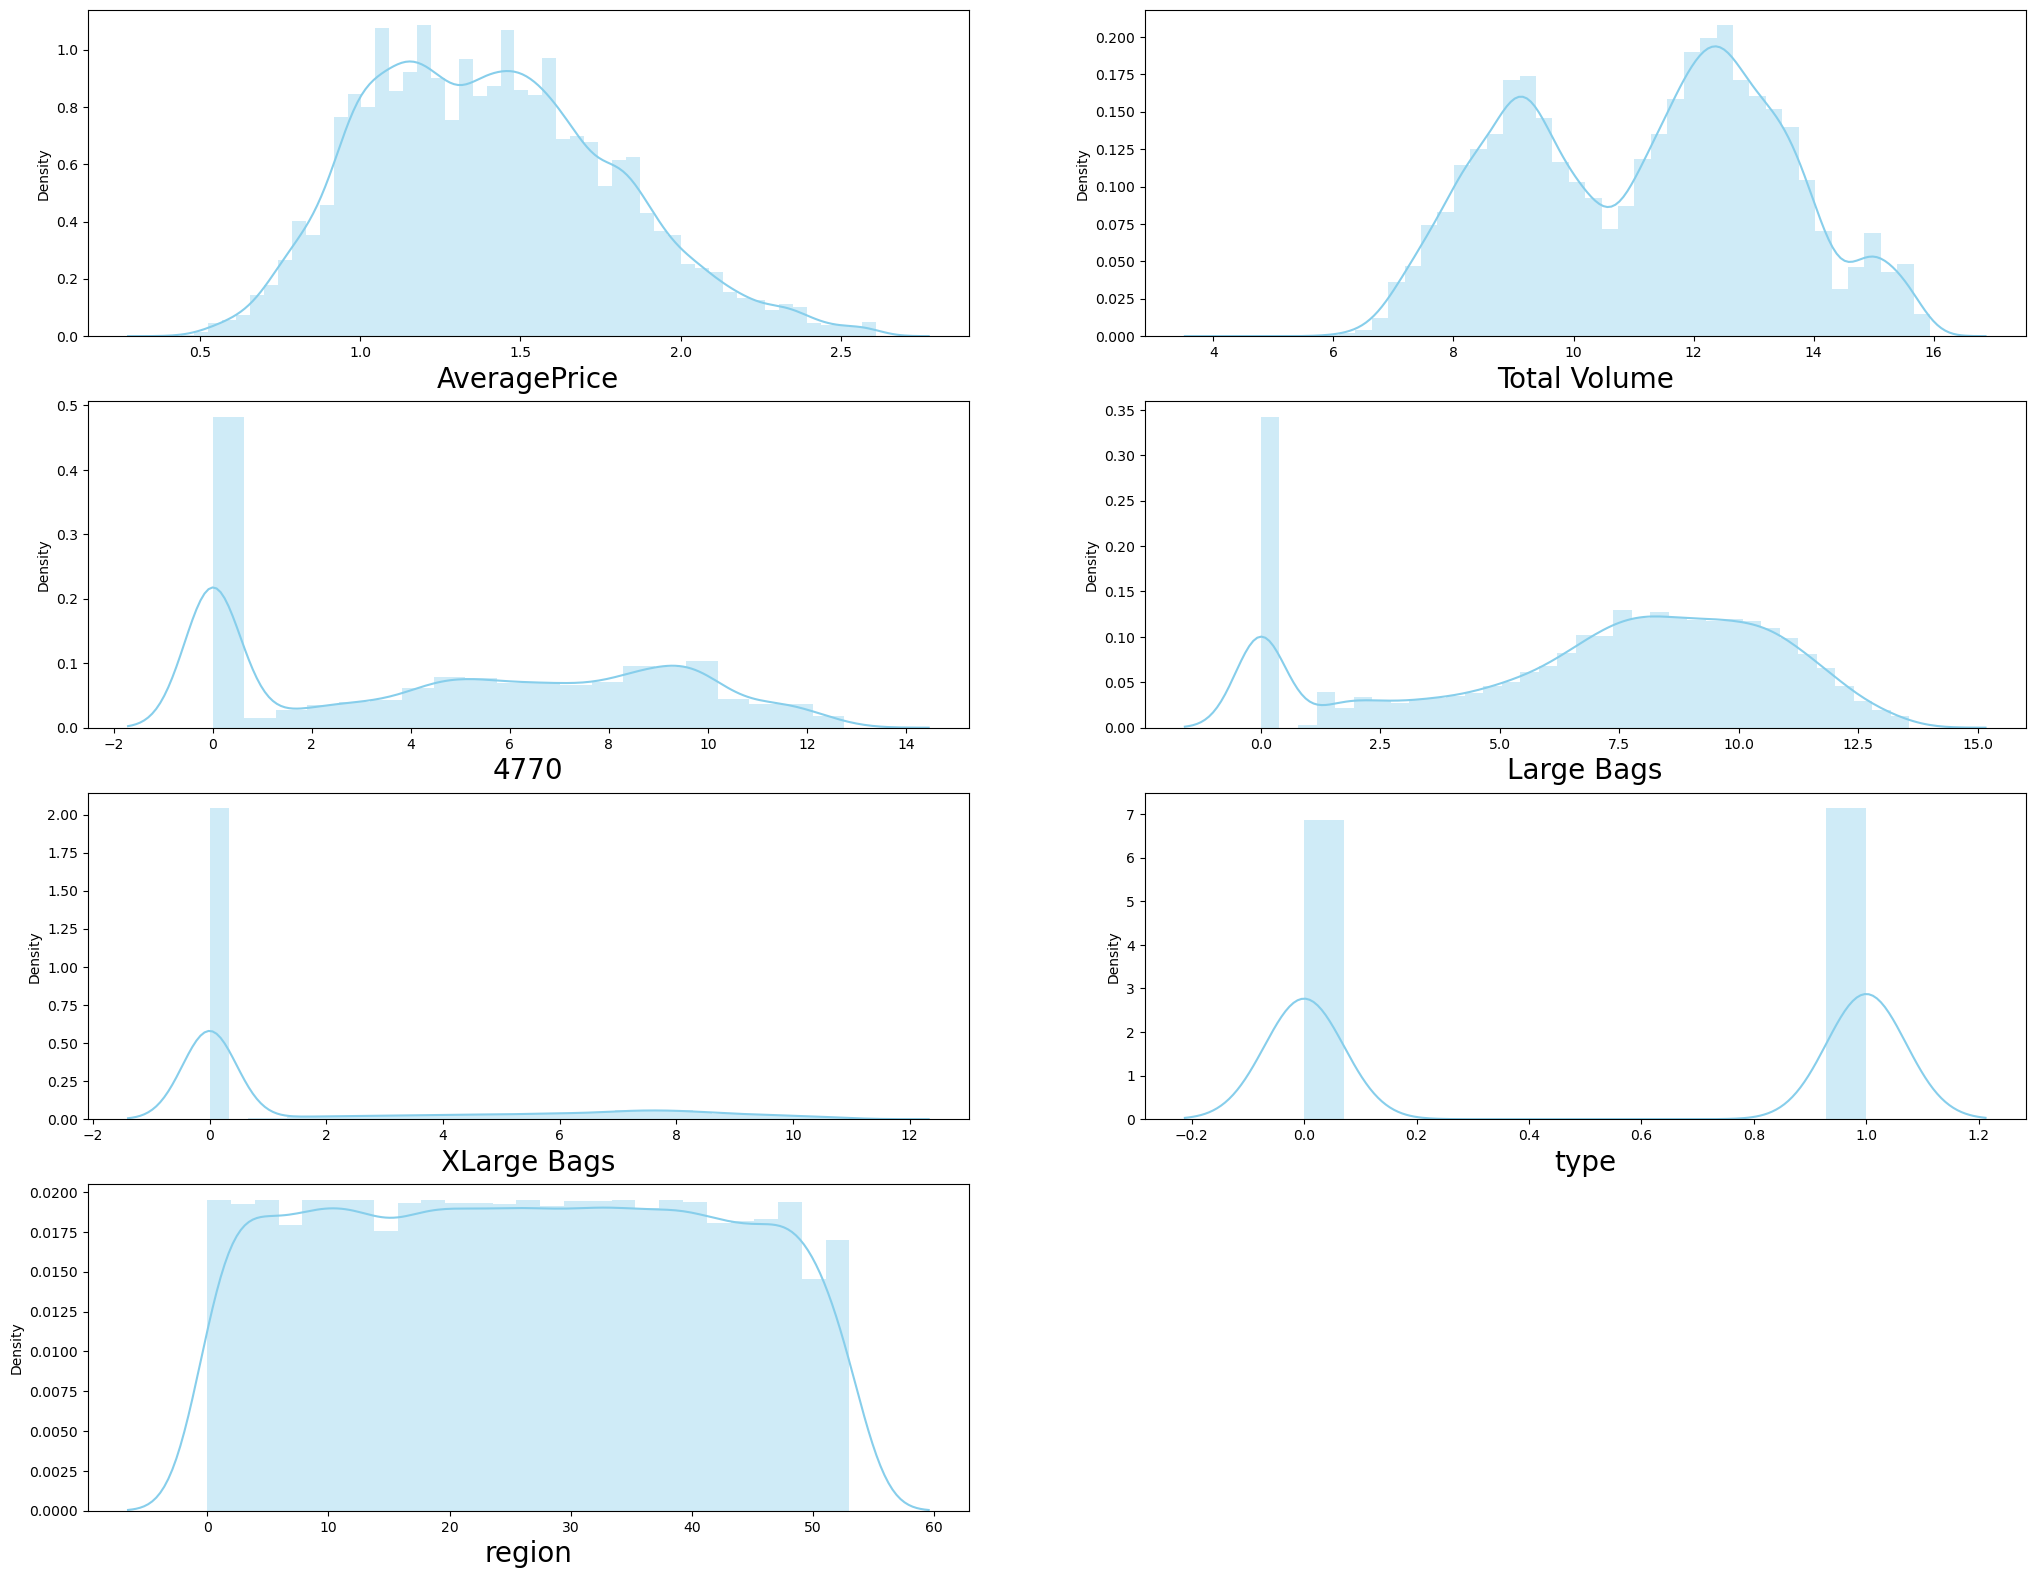

In [111]:
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df1.columns:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'skyblue')
        plt.xlabel(column,fontsize=20)

    plotnumber +=1
plt.show()

In [113]:
# Separating feature and target column
X1 = df1.drop("region",axis=1)
y1 = df1["region"]

In [114]:
# Scaling Data using StandardScaler
std=StandardScaler()
X1 = pd.DataFrame(std.fit_transform(X1), columns=X1.columns)

In [115]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.22,random_state=42)

In [116]:
# Model evaluation
def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')
    return accuracy, precision, recall, f1

models = {
    "Random_Forest": RandomForestClassifier(),
    "Decision_Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "KNeighbors_Classifier": KNeighborsClassifier(),
    "XGBoost": XGBClassifier()
}

trained_model_list = []
model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make Predictions
    y_pred = model.predict(X_test)

    accuracy, precision, recall, f1 = evaluate_model(y_test, y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    accuracy_list.append(accuracy)

    print('=' * 35)
    print('\n')

Random_Forest
Model Training Performance
Accuracy: 0.6670957775489187
Precision: 0.6687999812105664
Recall: 0.6670957775489187
F1 Score: 0.665748787713608


Decision_Tree
Model Training Performance
Accuracy: 0.5466014418125643
Precision: 0.5501571857385776
Recall: 0.5466014418125643
F1 Score: 0.5468628847642624


SVM
Model Training Performance
Accuracy: 0.49279093717816685
Precision: 0.5156114191579538
Recall: 0.49279093717816685
F1 Score: 0.483723332144677


KNeighbors_Classifier
Model Training Performance
Accuracy: 0.588053553038105
Precision: 0.5984796802913458
Recall: 0.588053553038105
F1 Score: 0.5877176103720685


XGBoost
Model Training Performance
Accuracy: 0.6408341915550978
Precision: 0.646438096532974
Recall: 0.6408341915550978
F1 Score: 0.6408182692824859




Thus we see RandomForest is giving highest Accuracy

In [117]:
param_grid = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 20], 
    'min_samples_leaf': [1, 4],    
    'max_features': ['auto', 'sqrt'],
}

# Create the Random Forest Classifier
rf = RandomForestClassifier()

# Initialize Grid Search with the classifier and parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1,verbose=2)

# Perform the Grid Search on your training data to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters:
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}
Test Set Accuracy: 0.6686405767250257
